In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "/Users/aridaneshmayeh/Desktop/ISM 6136/Project/heart_failure_clinical_records_dataset.csv"
heart_failure_data = pd.read_csv(file_path)



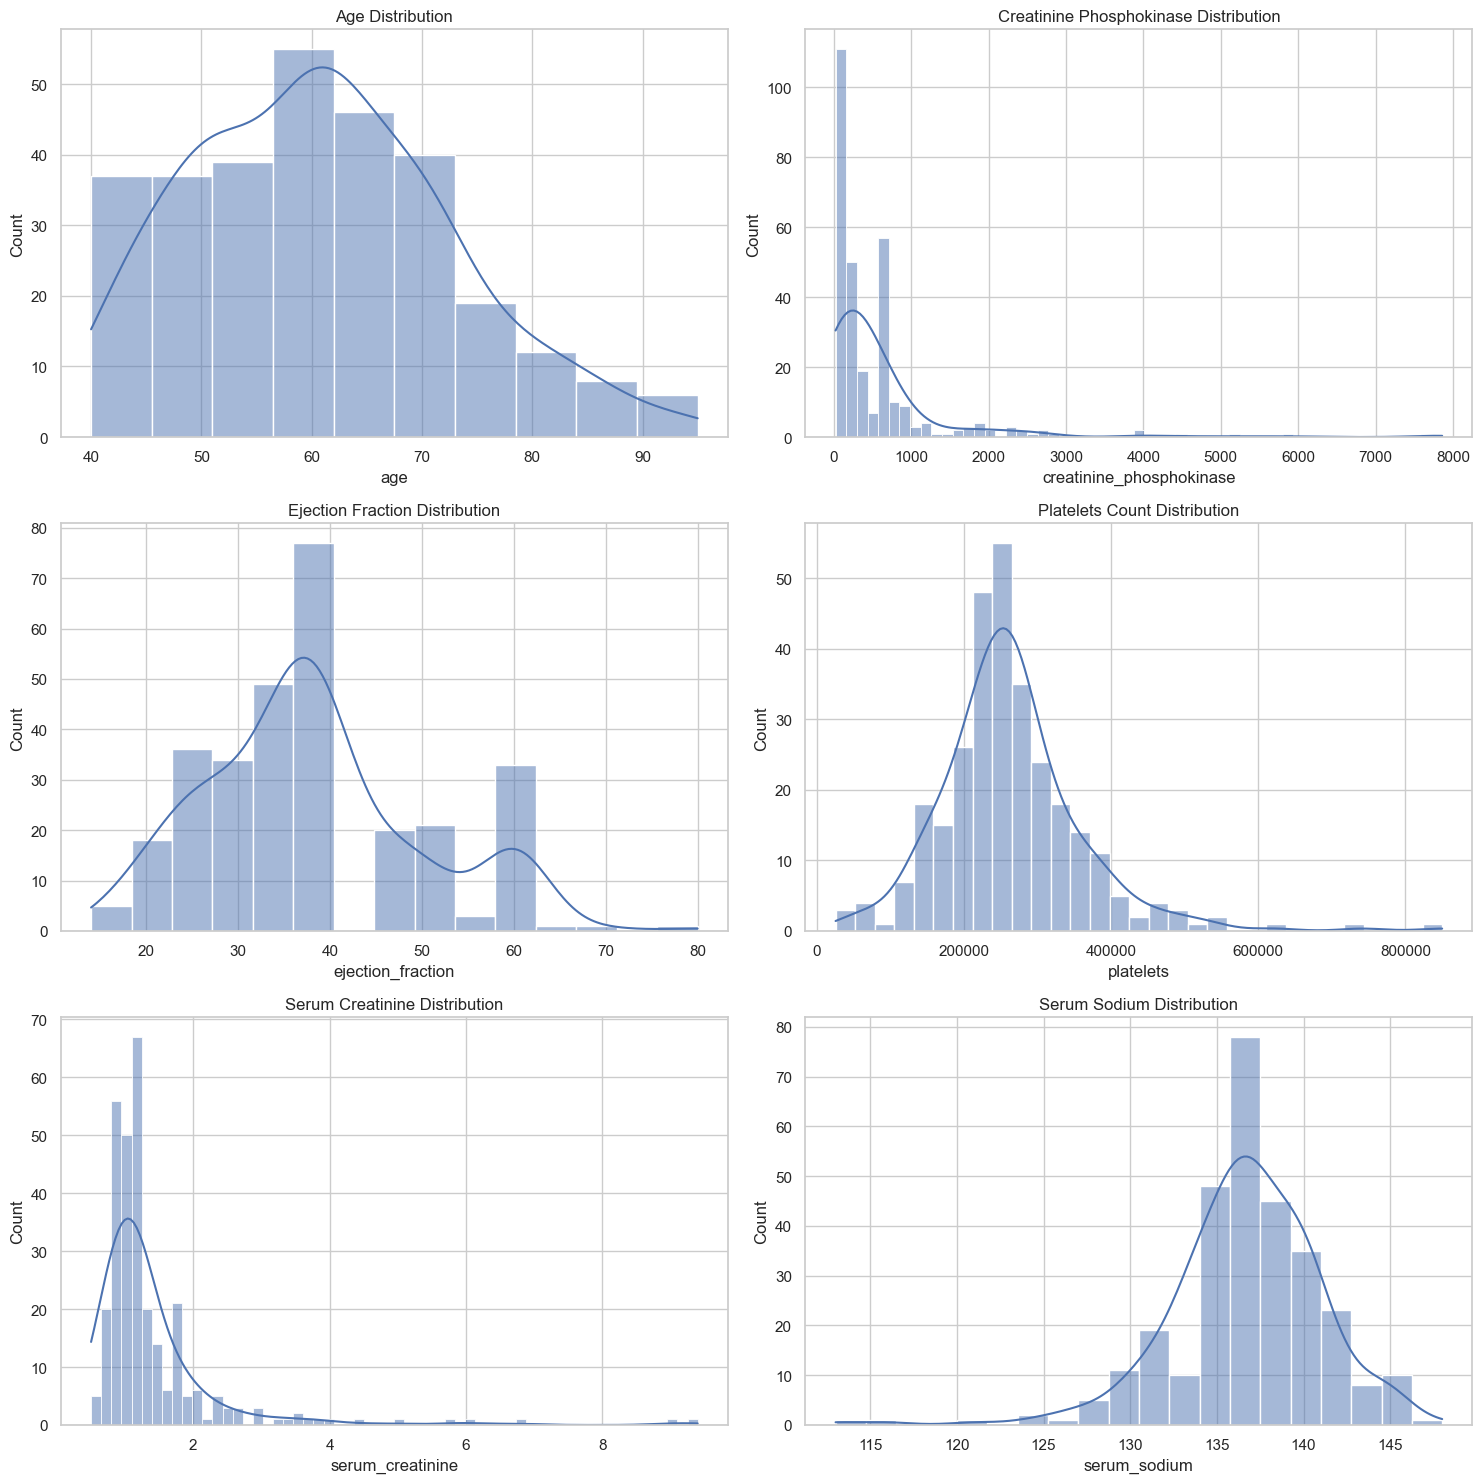

In [3]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(heart_failure_data['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(heart_failure_data['creatinine_phosphokinase'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Creatinine Phosphokinase Distribution')

sns.histplot(heart_failure_data['ejection_fraction'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Ejection Fraction Distribution')

sns.histplot(heart_failure_data['platelets'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Platelets Count Distribution')

sns.histplot(heart_failure_data['serum_creatinine'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Serum Creatinine Distribution')

sns.histplot(heart_failure_data['serum_sodium'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Serum Sodium Distribution')

plt.tight_layout()
plt.show()

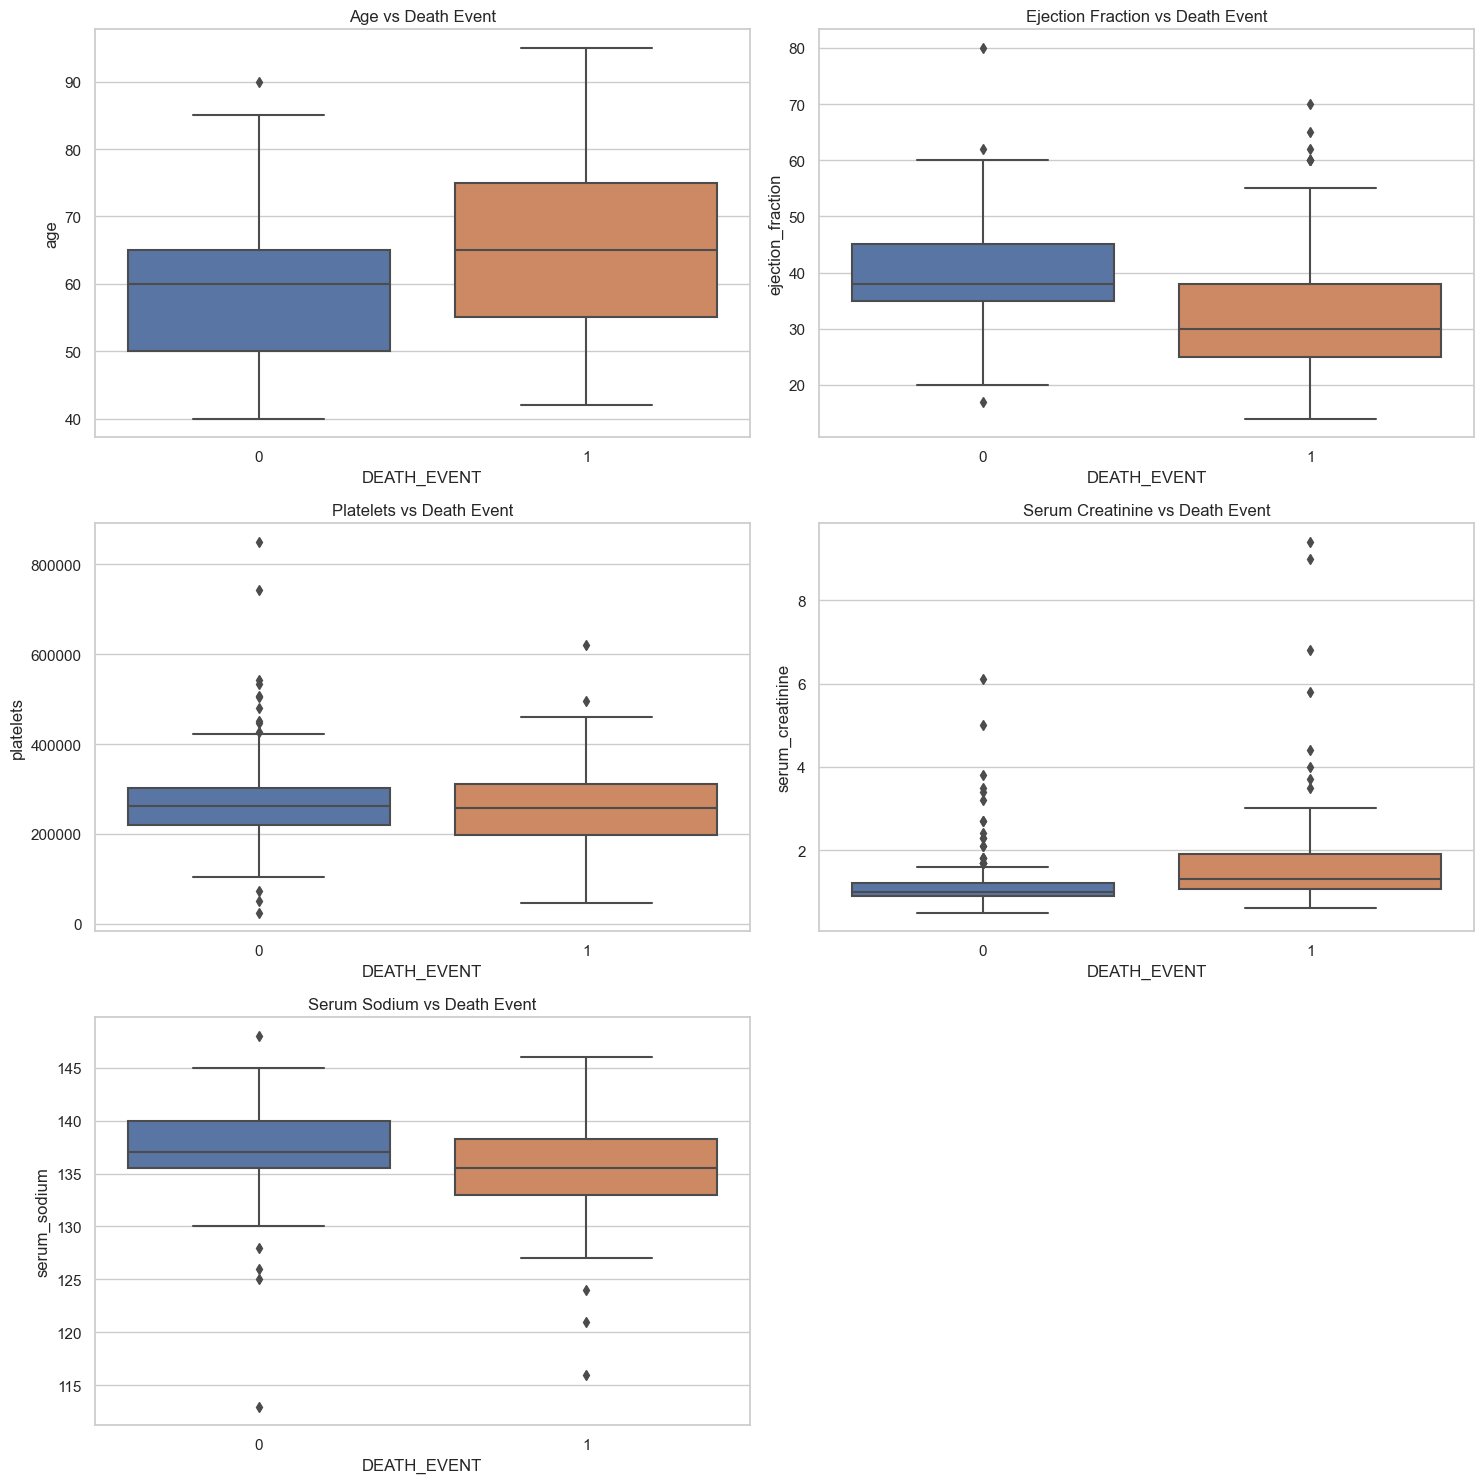

In [11]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(x='DEATH_EVENT', y='age', data=heart_failure_data, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Death Event')

sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=heart_failure_data, ax=axes[0, 1])
axes[0, 1].set_title('Ejection Fraction vs Death Event')

sns.boxplot(x='DEATH_EVENT', y='platelets', data=heart_failure_data, ax=axes[1, 0])
axes[1, 0].set_title('Platelets vs Death Event')

sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=heart_failure_data, ax=axes[1, 1])
axes[1, 1].set_title('Serum Creatinine vs Death Event')

sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=heart_failure_data, ax=axes[2, 0])
axes[2, 0].set_title('Serum Sodium vs Death Event')

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()


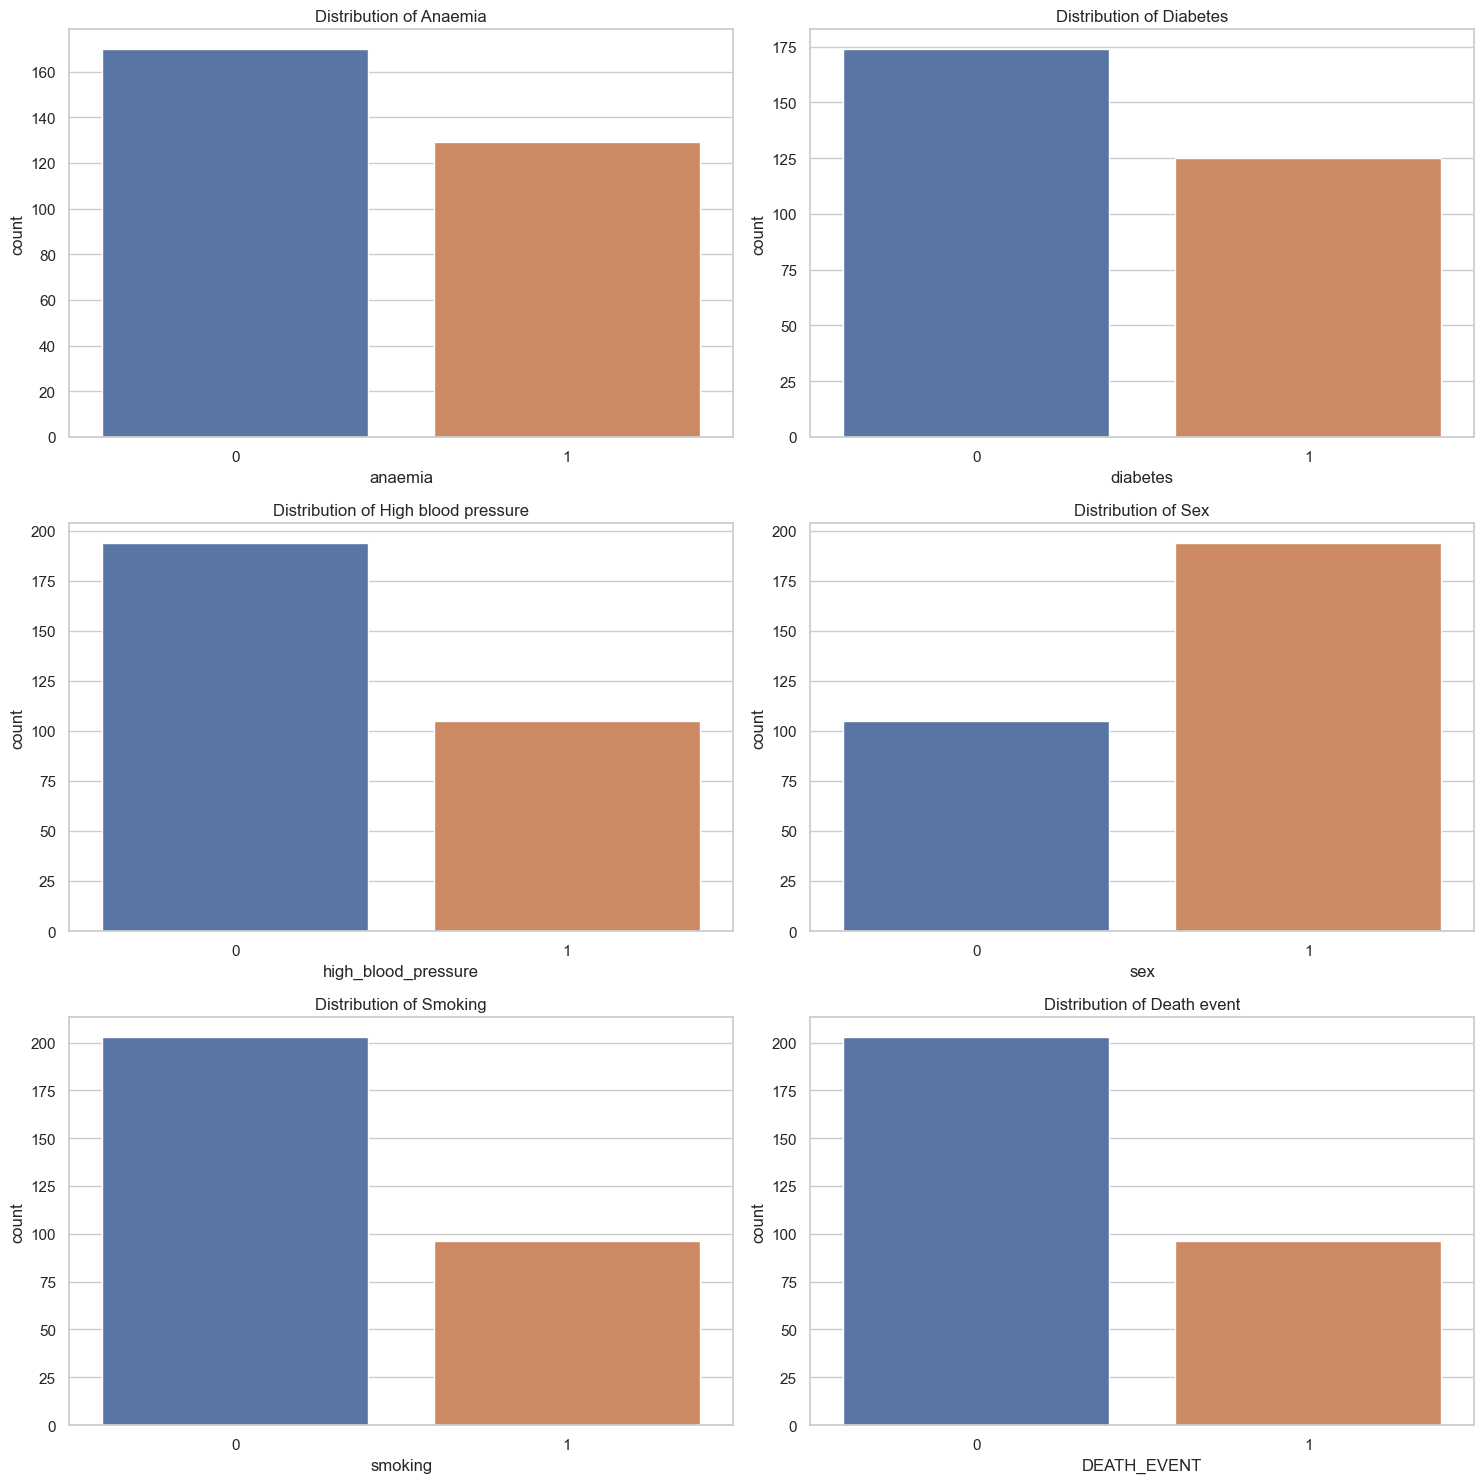

In [12]:
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=heart_failure_data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {column.capitalize().replace("_", " ")}')

plt.tight_layout()
plt.show()

In [4]:
X = heart_failure_data.drop('DEATH_EVENT', axis=1)
y = heart_failure_data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train_scaled, y_train)
lr_predictions = lr_clf.predict(X_test_scaled)


In [7]:
lr_coefficients = lr_clf.coef_[0]  
features = X.columns
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': lr_coefficients})
coefficients_df['Normalized Coefficient'] = coefficients_df['Coefficient'] / coefficients_df['Coefficient'].abs().max()
sorted_coefficients = coefficients_df.sort_values(by='Normalized Coefficient', key=abs, ascending=False)

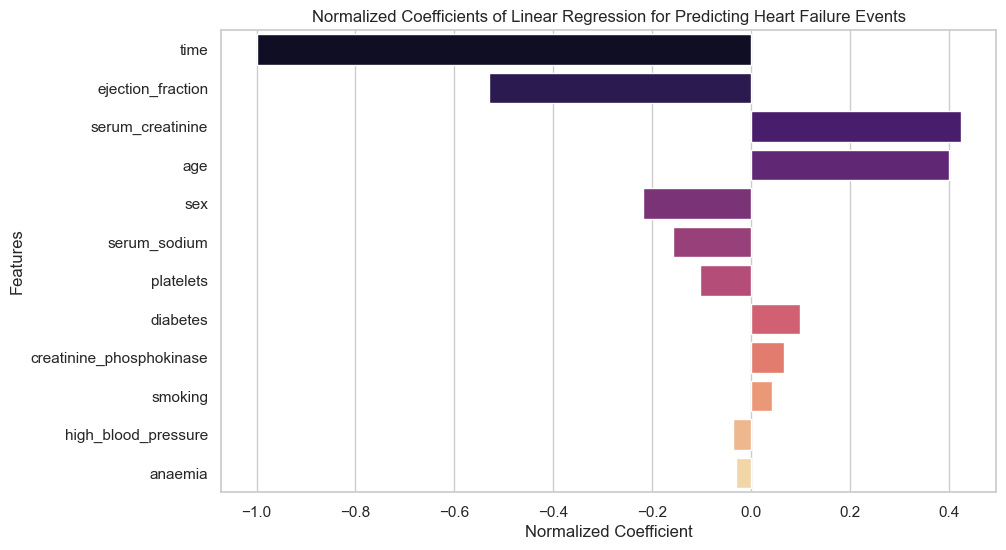

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Normalized Coefficient', y='Feature', data=sorted_coefficients, palette='magma')
plt.title('Normalized Coefficients of Linear Regression for Predicting Heart Failure Events')
plt.xlabel('Normalized Coefficient')
plt.ylabel('Features')
plt.show()

In [9]:
print(sorted_coefficients)


                     Feature  Coefficient  Normalized Coefficient
11                      time    -1.651823               -1.000000
4          ejection_fraction    -0.876091               -0.530378
7           serum_creatinine     0.701791                0.424858
0                        age     0.660513                0.399869
9                        sex    -0.361890               -0.219085
8               serum_sodium    -0.260442               -0.157669
6                  platelets    -0.170035               -0.102938
3                   diabetes     0.164115                0.099354
2   creatinine_phosphokinase     0.110611                0.066963
10                   smoking     0.070755                0.042834
5        high_blood_pressure    -0.060765               -0.036787
1                    anaemia    -0.051669               -0.031280


In [18]:
metrics = {
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rf_predictions),
        "Precision": precision_score(y_test, rf_predictions),
        "Recall": recall_score(y_test, rf_predictions),
        "F1 Score": f1_score(y_test, rf_predictions),
        "ROC-AUC": roc_auc_score(y_test, rf_predictions)
    },
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, lr_predictions),
        "Precision": precision_score(y_test, lr_predictions),
        "Recall": recall_score(y_test, lr_predictions),
        "F1 Score": f1_score(y_test, lr_predictions),
        "ROC-AUC": roc_auc_score(y_test, lr_predictions)
    }
}

metrics

{'Random Forest': {'Accuracy': 0.75,
  'Precision': 0.8571428571428571,
  'Recall': 0.48,
  'F1 Score': 0.6153846153846153,
  'ROC-AUC': 0.7114285714285714},
 'Logistic Regression': {'Accuracy': 0.8,
  'Precision': 0.9333333333333333,
  'Recall': 0.56,
  'F1 Score': 0.7000000000000001,
  'ROC-AUC': 0.7657142857142858}}

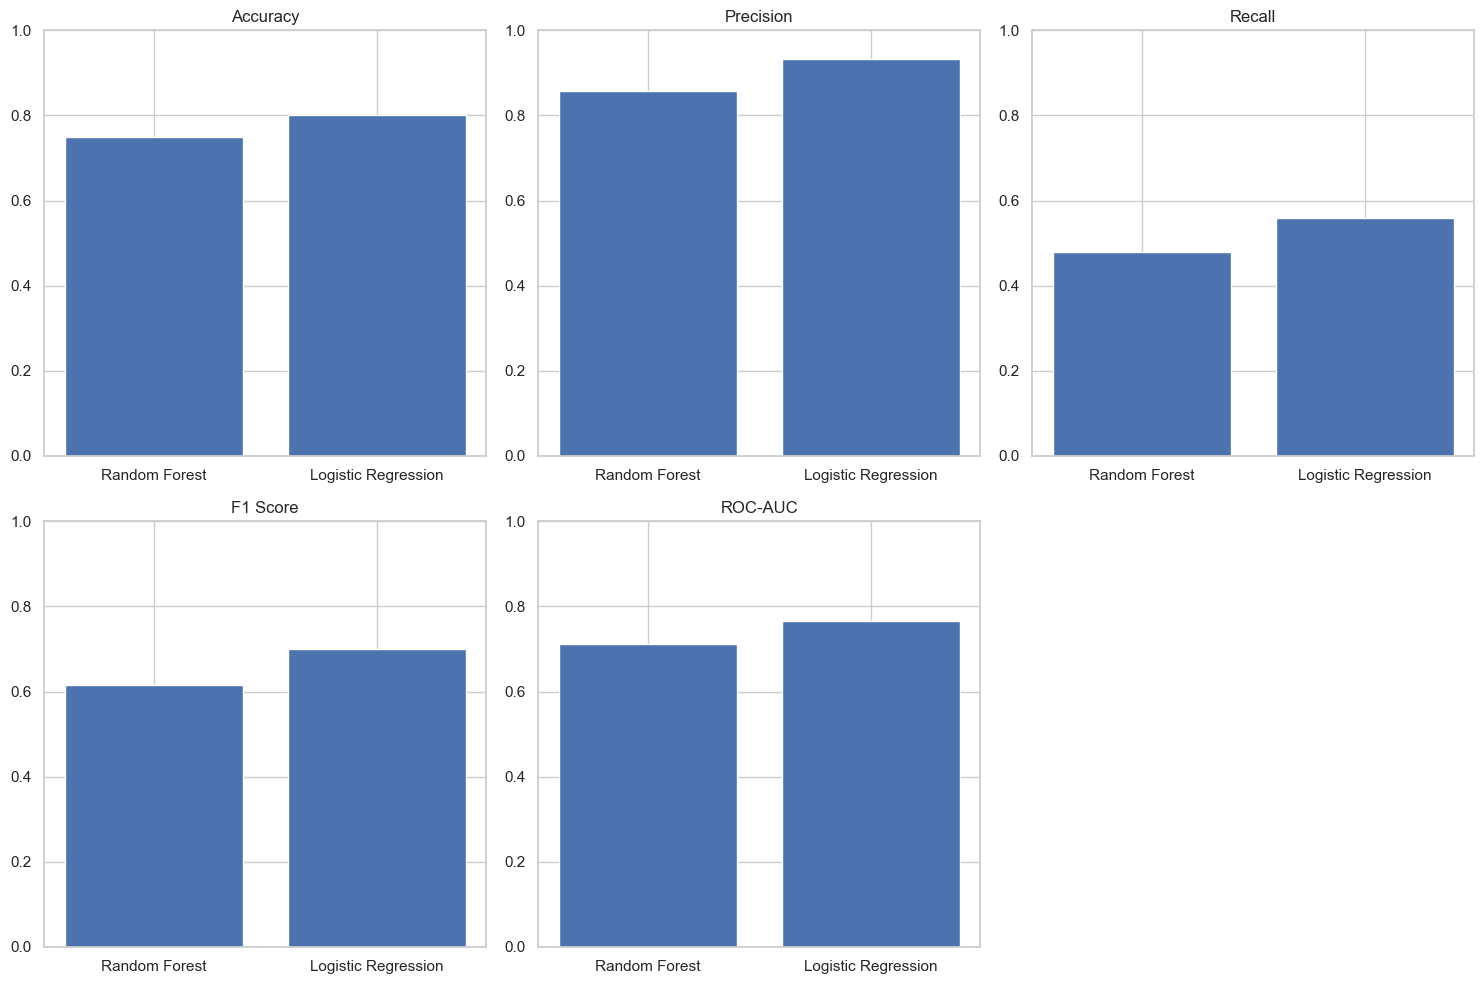

In [19]:
sns.set(style="whitegrid")

models = ['Random Forest', 'Logistic Regression']
accuracy = [0.75, 0.8]
precision = [0.8571, 0.9333]
recall = [0.48, 0.56]
f1_scores = [0.6154, 0.7]
roc_auc = [0.7114, 0.7657]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

#accuracy
ax[0, 0].bar(models, accuracy)
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylim(0, 1)

#precision
ax[0, 1].bar(models, precision)
ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim(0, 1)

#recall
ax[0, 2].bar(models, recall)
ax[0, 2].set_title('Recall')
ax[0, 2].set_ylim(0, 1)

#f1score
ax[1, 0].bar(models, f1_scores)
ax[1, 0].set_title('F1 Score')
ax[1, 0].set_ylim(0, 1)

#ROC-AUC
ax[1, 1].bar(models, roc_auc)
ax[1, 1].set_title('ROC-AUC')
ax[1, 1].set_ylim(0, 1)

fig.delaxes(ax[1][2])
plt.tight_layout()
plt.show()

In [20]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_predictions = rf_clf.predict(X_test_scaled)

In [21]:
feature_importances = rf_clf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

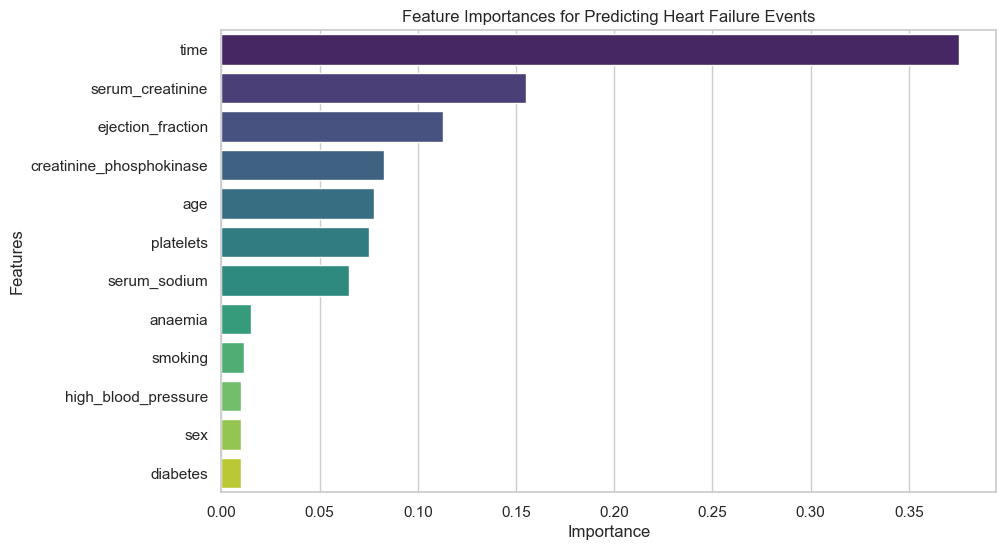

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance, palette='viridis')
plt.title('Feature Importances for Predicting Heart Failure Events')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()